In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
import time



C:\Users\siddh\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\__init__.py:169: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Reading the dataset
data = pd.read_csv("Boston (1).csv")



In [3]:
# Preprocessing the dataset
x = data.drop('MEDV', axis=1)
y = data['MEDV']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)



In [4]:
# Model definition
model = Sequential()
model.add(Dense(128, input_shape=(13,), activation='relu', name='dense_1'))
model.add(Dense(64, activation='relu', name='dense_2'))
model.add(Dense(1, activation='linear', name='dense_output'))
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()



C:\Users\siddh\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                      │ (None, 128)                 │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_output (Dense)                 │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,113 (39.50 KB)

 Trainable params: 10,113 (39.50 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
# Training the model
start_time = time.time()
history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_split=0.2)
train_time = time.time() - start_time
print("Training time:", train_time)



Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 590.1887 - mae: 22.3808 - val_loss: 484.0896 - val_mae: 19.8953
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 465.7689 - mae: 19.5783 - val_loss: 401.5799 - val_mae: 17.9289
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 407.7350 - mae: 18.2729 - val_loss: 296.4463 - val_mae: 15.1736
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 296.5917 - mae: 15.0056 - val_loss: 181.7948 - val_mae: 11.5190
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 168.9354 - mae: 10.8191 - val_loss: 92.1321 - val_mae: 7.8782
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 86.6853 - mae: 7.3776 - val_loss: 56.3161 - val_mae: 5.7157
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 53.0142 - mae: 5.3975 - val_loss: 44.7666 - val_mae: 4.8845
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 40.6448 - mae: 4.7190 - val_loss: 35.2940 - val_mae: 4.1799
Epoch 9/50
11/11 ━━━━━━━━━━━━━━━━━━━━

In [6]:
# Evaluating the model
start_time = time.time()
mse, mae = model.evaluate(x_test, y_test)
test_time = time.time() - start_time
print("Testing time:", test_time)
print("MSE:", mse)
print("MAE:", mae)



4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 10.1907 - mae: 2.6170
Testing time: 0.1223306655883789
MSE: 10.419005393981934
MAE: 2.6071465015411377


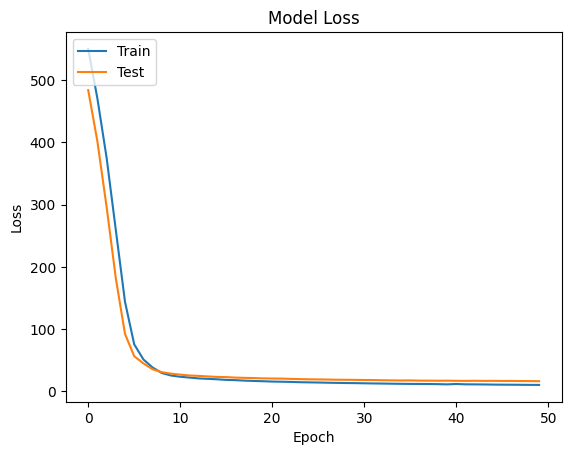

In [7]:
# Plotting the training history
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [8]:
# Predicting using dynamic input from the user
while True:
    try:
        user_input = [float(x.strip()) for x in input("Enter the values of 13 features separated by commas: ").split(',')]
        if len(user_input) != 13:
            print("Please enter exactly 13 values.")
            continue
        user_input = np.array(user_input).reshape(1, 13)
        user_input_scaled = scaler.transform(user_input)  # Scale input features
        
        start_time = time.time()
        prediction = model.predict(user_input_scaled)
        pred_time = time.time() - start_time
        
        print("Predicted MEDV:", prediction[0][0])
        print("Prediction time:", pred_time)
    except ValueError:
        print("Please enter numerical values only.")
    except KeyboardInterrupt:
        print("\nExiting...")
        break
# 0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.9,9.14

Enter the values of 13 features separated by commas:  # 0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.9,9.14


Please enter numerical values only.


Enter the values of 13 features separated by commas:  0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.9,9.14


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


C:\Users\siddh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Predicted MEDV: 23.783222
Prediction time: 0.11394405364990234

Exiting...
